In [1]:
from glob import glob
import matplotlib.pyplot as plt 
import cv2
import numpy as np

imgs = glob('./test_data/*')

In [2]:
imgs

['./test_data/light_stick_47_1.jpg']

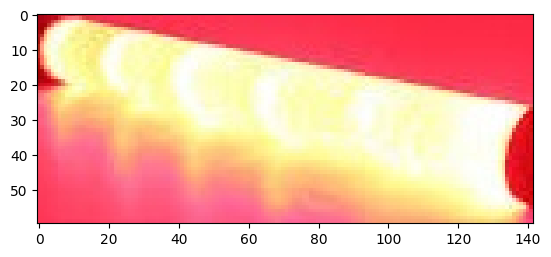

In [3]:
for i in imgs:
    img = cv2.imread(i)
    h, w = img.shape[:2]
    
    # print(img.shape)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.imshow(img)
    break

In [45]:
max(1,2)

2

In [46]:
import sys
import matplotlib.pyplot as plt
for j,i in enumerate(imgs):
    if j != 0:
        continue


    img = cv2.imread(i)
    img2 = img.copy()
    h, w = img.shape[:2]
    # 그레이 스케일 변환 및 엣지 검출 ---①
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(imgray, 100, 200 )
    plt.imshow(edges)
    # 허프 선 검출, 직선으로 판단할 최소한의 점은 130개로 지정 ---②
    lines = cv2.HoughLines(edges, 3, np.pi/180, int(max(h,w) * 0.55))
    # plt.imshow(lines)
    print(lines)
    for line in lines: # 검출된 모든 선 순회
        r,theta = line[0] # 거리와 각도
        tx, ty = np.cos(theta), np.sin(theta) # x, y축에 대한 삼각비
        x0, y0 = tx*r, ty*r  #x, y 기준(절편) 좌표
        # 기준 좌표에 빨강색 점 그리기
        # cv2.circle(img2, (abs(x0), abs(y0)), 3, (0,0,255), -1)
        # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
        x1, y1 = int(x0 + w*(-ty)), int(y0 + h * tx)
        x2, y2 = int(x0 - w*(-ty)), int(y0 - h * tx)
        # 선그리기
        cv2.line(img2, (x1, y1), (x2, y2), (0,255,0), 1)

    #결과 출력    
    merged = np.hstack((img, img2))
    cv2.imshow('hough line', merged)
    cv2.waitKey()
    cv2.destroyAllWindows()

[[[ 0.         1.7627826]]

 [[-3.         1.7802358]]]


inotify_add_watch(/home/tekim/Pictures) failed: (No space left on device)
inotify_add_watch(/media/tekim/tekim/datapython/modules/fire/straight_extract) failed: (No space left on device)


In [14]:
np.pi

3.141592653589793

./test_data/light_stick_47_1.jpg


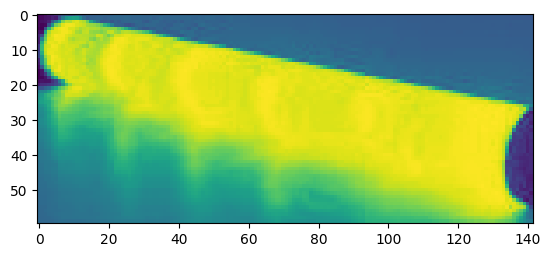

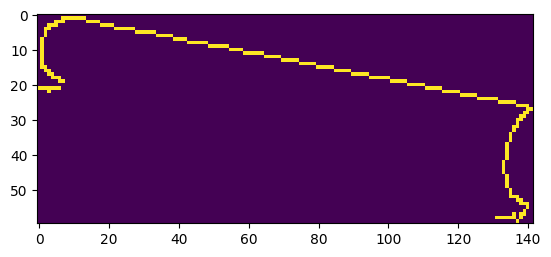

In [4]:
for j,i in enumerate(imgs):
    if j != 0:
        continue
    print(i)
    src = cv2.imread(i)
    dst = src.copy()
    h, w = src.shape[:2]
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    # edges = cv2.Canny(gray, 100, 200 )
    edges = cv2.Canny(gray, 100, 200 )
    plt.imshow(gray)
    plt.show()
    plt.imshow(edges)
    plt.show()
    # 허프 선 검출, 직선으로 판단할 최소한의 점은 130개로 지정 ---②
    lines = cv2.HoughLines(edges, 1, np.pi/180, int(max(h,w) * 0.55))
    # canny = cv2.Canny(gray, 100, 200, apertureSize = 5, L2gradient = True)
    # lines = cv2.HoughLines(edges, 0.8, np.pi / 180, 150, srn = 100, stn = 200, min_theta = 0, max_theta = np.pi)

    for i in lines:
        rho, theta = i[0][0], i[0][1]
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a*rho, b*rho

        scale = src.shape[0] + src.shape[1]

        x1 = int(x0 + scale * -b)
        y1 = int(y0 + scale * a)
        x2 = int(x0 - scale * -b)
        y2 = int(y0 - scale * a)

        cv2.line(dst, (x1, y1), (x2, y2), (255, 0, 0), 2)
        # cv2.circle(dst, (x0, y0), 3, (255, 0, 0), 5, cv2.FILLED)
    cv2.imshow("dst", dst)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    break

In [5]:
lines

array([[[-1.       ,  1.7627826]]], dtype=float32)